In [3]:
from astropy.io import fits
file = fits.open('lightcurvesat2017gfo.fit')
print(file)

[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x000002688D18DE80>, <astropy.io.fits.hdu.table.TableHDU object at 0x000002688D18E120>]


In [4]:
data = file[1].data 

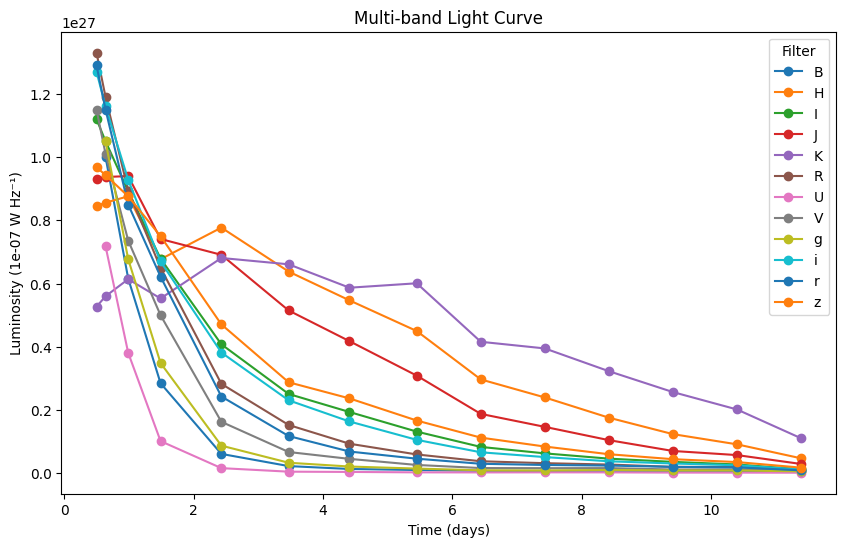

In [5]:
import matplotlib.pyplot as plt
import numpy as np

filters = np.unique(data['Filter']) #finds all unique filter values like 'U', 'B' 'R' etc.
plt.figure(figsize=(10, 6))

for f in filters:
    mask = data['Filter'] == f #creates a boolean array called mask that is true where the Filter matches the current filter and
                                #false where not
    time = data['Time'][mask].astype(float) #gets the time for values in that filter
    lum = data['Lum'][mask].astype(float) #gets the luminosity for values in that filter
    plt.plot(time, lum, marker='o', linestyle='-', label=f if hasattr(f, 'decode') else f) 

plt.xlabel('Time (days)')
plt.ylabel('Luminosity (1e-07 W Hz⁻¹)')
plt.title('Multi-band Light Curve')
plt.legend(title='Filter')
plt.show()


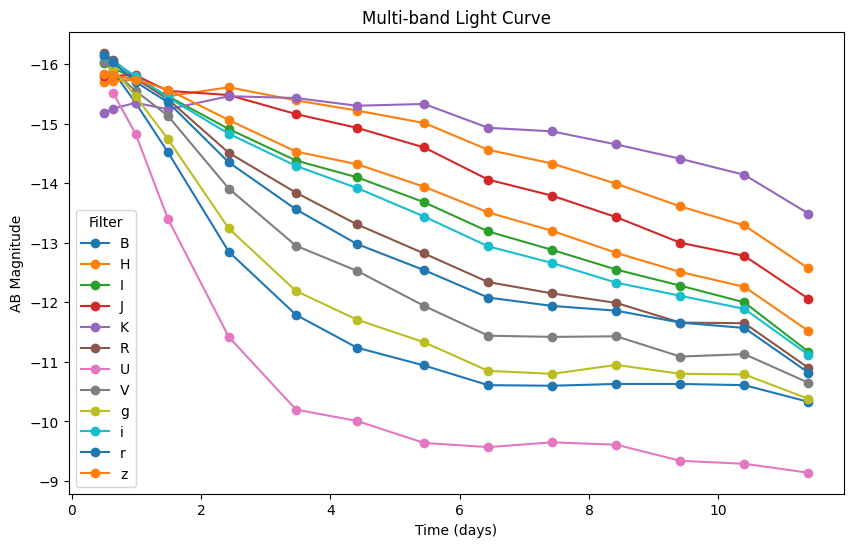

In [7]:
import matplotlib.pyplot as plt
import numpy as np

filters = np.unique(data['Filter']) #finds all unique filter values like 'U', 'B' 'R' etc.
plt.figure(figsize=(10, 6))

for f in filters:
    
    mask = data['Filter'] == f #creates a boolean array called mask that is true where the Filter matches the current filter and
                                #false where not
    time = data['Time'][mask].astype(float) #gets the time for values in that filter
    mag = data['Mag'][mask].astype(float)  #gets the ABSOLUTE magnitude for values in that filter
    plt.plot(time, mag, marker='o', linestyle='-', label=f if hasattr(f, 'decode') else f) 

plt.gca().invert_yaxis()
plt.xlabel('Time (days)')
plt.ylabel('AB Magnitude')
plt.title('Multi-band Light Curve')
plt.legend(title='Filter')
plt.show()

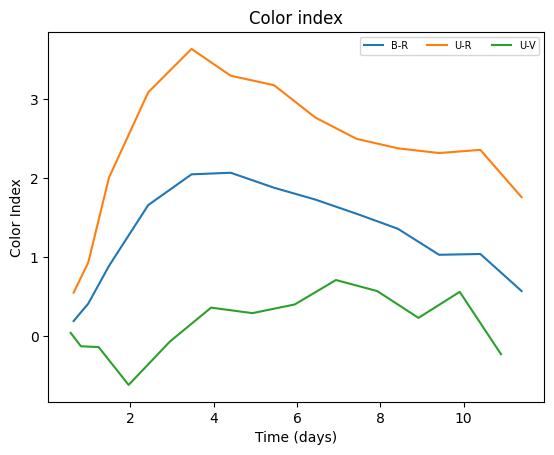

In [15]:
from scipy import interpolate
mag_r= []
time_r= []
mag_b = []
time_b = []
mag_u = []
time_u = []
mag_v = []
time_v = []
col_index_br = {}
col_index_ur = {}
col_index_vr = {}
for line in data:
    if line['Filter'] == 'B':
        mag_b.append(line['Mag'])
        time_b.append(line['Time'])
        
    if line['Filter'] == 'R':
        mag_r.append(line['Mag'])
        time_r.append(line['Time'])

    if line['Filter'] == 'U':
        mag_u.append(line['Mag'])
        time_u.append(line['Time'])

    if line['Filter'] == 'V':
        mag_v.append(line['Mag'])
        time_v.append(line['Time'])

mag_r.pop(0) #none of the other filters contain a magnitude at time '0.5', so i remove that value in the R filter's data set to make it more accurate.
time_r.pop(0)
f = interpolate.interp1d(time_b, mag_b, fill_value='extrapolate')
# time_b.insert(0, np.float64(0.5))
# mag_b.insert(0, f(time_b[0]))
for i in range(len(mag_r)):
    col_index_br[(mag_b[i] - mag_r[i]).astype(float)] = ((time_b[i] + time_r[i])/2).astype(float)
    col_index_ur[(mag_u[i] - mag_r[i]).astype(float)] = ((time_u[i] + time_r[i])/2).astype(float)
    col_index_vr[(mag_v[i] - mag_r[i]).astype(float)] = ((time_v[i] + time_r[i])/2).astype(float)
plt.plot(col_index_br.values(), col_index_br.keys(),'-', label="B-R") 
plt.plot(col_index_ur.values(), col_index_ur.keys(),'-', label="U-R") 
plt.plot(col_index_vr.values(), col_index_vr.keys(),'-', label="U-V") 
plt.xlabel('Time (days)')
plt.ylabel('Color Index')
plt.title('Color index')
plt.legend(loc='upper right', fontsize = 7, ncol = 3)
plt.show()